### Import libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Convert to dataframe object csv with data

In [46]:
case_study_table = pd.read_csv('/Users/adolfomytr/Documents/Data Science/VS Code/case_study_medbelle.csv')
case_study_table.head()

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at
0,6.952231e+10,with-credit-card,20/12/19,21/12/19,NaN,11/01/20,patient-show,13/01/20
1,9.320000e+11,with-credit-card,23/12/19,NaN,NaN,NaN,NaN,NaN
2,9.800000e+11,with-credit-card,19/12/19,19/12/19,NaN,05/01/20,patient-no-show,NaN
3,5.340000e+11,with-credit-card,22/12/19,NaN,NaN,NaN,NaN,NaN
4,9.340000e+11,no-credit-card,23/12/19,NaN,NaN,NaN,NaN,NaN


### Mean of avg patients for creation date with credit card

In [47]:
with_credit_card = case_study_table[case_study_table['experiment_group'] == 'with-credit-card']
mean_with_credit_card = with_credit_card.groupby('patient_created_at')['patient_id'].count()
mean_with_credit_card = np.mean(mean_with_credit_card)

### Mean of avg patients for creation darta without credit card

In [48]:
no_credit_card = case_study_table[case_study_table['experiment_group'] == 'no-credit-card']
mean_no_credit_card = no_credit_card.groupby('patient_created_at')['patient_id'].count()
mean_no_credit_card = np.mean(mean_no_credit_card)

### Ordered df by patient creation

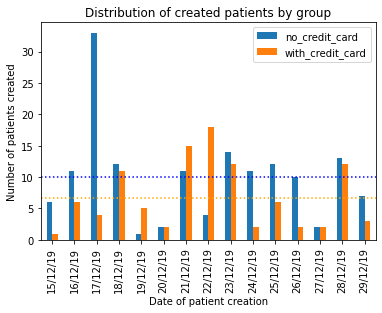

In [49]:
ordered_by_patient_creation = case_study_table.sort_values('patient_created_at')
ordered_by_patient_creation = ordered_by_patient_creation.groupby(['patient_created_at', 'experiment_group'])['patient_id'].count()
ordered_by_patient_creation = pd.DataFrame(ordered_by_patient_creation)
ordered_by_patient_creation = pd.DataFrame(ordered_by_patient_creation.pivot_table(values=['patient_id'], index = 'patient_created_at', columns = ['experiment_group']))

ordered_by_patient_creation.plot(kind = 'bar')  ##Chart 1 in document
plt.title('Distribution of created patients by group')
plt.xlabel('Date of patient creation')
plt.ylabel('Number of patients created')
plt.legend(['no_credit_card', 'with_credit_card'])
plt.axhline(mean_with_credit_card, color='orange', ls='dotted')
plt.axhline(mean_no_credit_card, color='blue', ls='dotted')
plt.show()

### Distribution of users according to experiment group

In [50]:
group_distribution = case_study_table.value_counts('experiment_group')
group_distribution_percentages = case_study_table.value_counts('experiment_group', normalize=True)

### Table detailing process funnel, from creation to booking

In [51]:
funnel_patient_id = pd.DataFrame(case_study_table.groupby('experiment_group')['patient_id'].count())
funnel_patient_created_at = pd.DataFrame(case_study_table.groupby('experiment_group')['patient_created_at'].count())
funnel_first_cx_booked_at = pd.DataFrame(case_study_table.groupby('experiment_group')['first_cx_booked_at'].count())
funnel_first_cx_cancelled_at = pd.DataFrame(case_study_table.groupby('experiment_group')['first_cx_cancelled_at'].count())
funnel_cx_appointment_at = pd.DataFrame(case_study_table.groupby('experiment_group')['cx_appointment_at'].count())
funnel_appointment_attendance = pd.DataFrame(case_study_table.groupby('experiment_group')['appointment_attendance'].count())
funnel_px_booked_at = pd.DataFrame(case_study_table.groupby('experiment_group')['px_booked_at'].count())

complete_funnel = funnel_patient_id.merge(funnel_patient_created_at, on = ['experiment_group']) \
                                    .merge(funnel_first_cx_booked_at, on = ['experiment_group']) \
                                    .merge(funnel_first_cx_cancelled_at, on = ['experiment_group']) \
                                    .merge(funnel_cx_appointment_at, on = ['experiment_group']) \
                                    .merge(funnel_appointment_attendance, on = ['experiment_group']) \
                                    .merge(funnel_px_booked_at, on = ['experiment_group'])

trans_complete_funnel = pd.DataFrame(complete_funnel.transpose())
print(trans_complete_funnel)
trans_complete_funnel = trans_complete_funnel[trans_complete_funnel.index != 'first_cx_cancelled_at']
trans_complete_funnel = trans_complete_funnel[trans_complete_funnel.index != 'patient_id']

experiment_group        no-credit-card  with-credit-card
patient_id                         149               101
patient_created_at                 149               101
first_cx_booked_at                  92                45
first_cx_cancelled_at               10                 6
cx_appointment_at                   84                43
appointment_attendance              84                45
px_booked_at                         9                 6


### Bar chart with funnel 

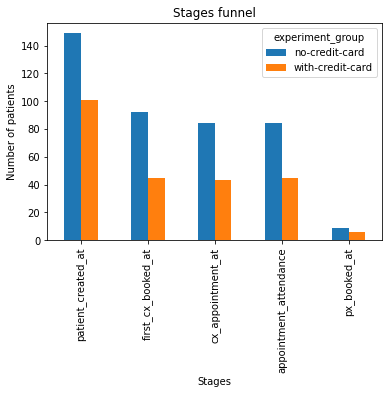

In [52]:
trans_complete_funnel.plot(kind = 'bar')
plt.title('Stages funnel')
plt.xlabel('Stages')
plt.ylabel('Number of patients')
plt.show()


### Calculate churn indicators for each stage of the funnel in the same table

In [53]:
complete_funnel['churn_existing_to_created'] = 1 - round(complete_funnel['patient_created_at'] / complete_funnel['patient_id'], 3)
complete_funnel['churn_created_to_booked'] = 1 - round(complete_funnel['first_cx_booked_at'] / complete_funnel['patient_created_at'], 3)
complete_funnel['churn_booked_to_cancelled'] = round(complete_funnel['first_cx_cancelled_at'] / complete_funnel['first_cx_booked_at'], 3)  ##We dont use '1 -' formula casuse this result isn't comparable to the next stage, but it only references the previous step but does not continoues
complete_funnel['churn_booked_to_appointment'] = 1 - round(complete_funnel['cx_appointment_at'] / complete_funnel['first_cx_booked_at'], 3)
complete_funnel['churn_appointment_to_attendance'] = 1 - round(complete_funnel['appointment_attendance'] / complete_funnel['cx_appointment_at'], 3)
complete_funnel['churn_apponitment_to_procedure'] = 1 - round(complete_funnel['px_booked_at'] / complete_funnel['cx_appointment_at'], 3)
print(complete_funnel)

                  patient_id  patient_created_at  first_cx_booked_at  \
experiment_group                                                       
no-credit-card           149                 149                  92   
with-credit-card         101                 101                  45   

                  first_cx_cancelled_at  cx_appointment_at  \
experiment_group                                             
no-credit-card                       10                 84   
with-credit-card                      6                 43   

                  appointment_attendance  px_booked_at  \
experiment_group                                         
no-credit-card                        84             9   
with-credit-card                      45             6   

                  churn_existing_to_created  churn_created_to_booked  \
experiment_group                                                       
no-credit-card                          0.0                    0.383   
with-credit-c

### Table and chart of churn indicators

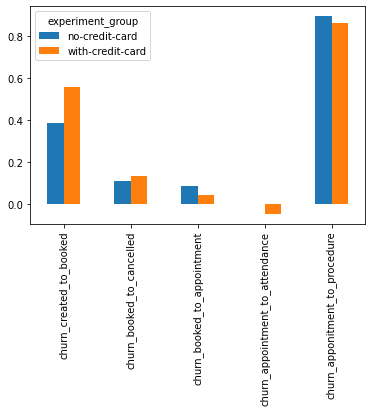

In [54]:
churn_indicators = complete_funnel[['churn_created_to_booked', 
                                    'churn_booked_to_cancelled',
                                    'churn_booked_to_appointment',
                                    'churn_appointment_to_attendance',
                                    'churn_apponitment_to_procedure']]

churn_indicators.transpose().plot(kind = 'bar')
plt.show()

### Total conversion per experiment group

In [55]:
total_conversion_per_group = round(complete_funnel['px_booked_at'] / complete_funnel['patient_created_at'],3)
print(total_conversion_per_group)

experiment_group
no-credit-card      0.060
with-credit-card    0.059
dtype: float64


### Days conversion for each stage

In [56]:
table_days_conversion = case_study_table[['experiment_group', 
                                        'patient_created_at',
                                        'first_cx_booked_at',
                                        'cx_appointment_at',
                                        'px_booked_at']]

table_days_conversion['created_to_booked'] = (pd.to_datetime(table_days_conversion['first_cx_booked_at'], format='%d/%m/%y') - pd.to_datetime(table_days_conversion['patient_created_at'], format='%d/%m/%y')).dt.days
table_days_conversion['booked_to_appointment'] = (pd.to_datetime(table_days_conversion['cx_appointment_at'], format='%d/%m/%y') - pd.to_datetime(table_days_conversion['first_cx_booked_at'], format='%d/%m/%y')).dt.days
table_days_conversion['appointment_to_procedure'] = (pd.to_datetime(table_days_conversion['px_booked_at'], format='%d/%m/%y') - pd.to_datetime(table_days_conversion['cx_appointment_at'], format='%d/%m/%y')).dt.days

<ipython-input-56-f477d1bfcee7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_days_conversion['created_to_booked'] = (pd.to_datetime(table_days_conversion['first_cx_booked_at'], format='%d/%m/%y') - pd.to_datetime(table_days_conversion['patient_created_at'], format='%d/%m/%y')).dt.days
<ipython-input-56-f477d1bfcee7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_days_conversion['booked_to_appointment'] = (pd.to_datetime(table_days_conversion['cx_appointment_at'], format='%d/%m/%y') - pd.to

### Summaries for each stage

In [57]:
summary_created_to_booked = table_days_conversion.groupby('experiment_group')['created_to_booked'].agg([np.mean, np.median ,min, max, sum])
summary_booked_to_appointment = table_days_conversion.groupby('experiment_group')['booked_to_appointment'].agg([np.mean, np.median ,min, max, sum])
summary_appointment_to_procedure = table_days_conversion.groupby('experiment_group')['appointment_to_procedure'].agg([np.mean, np.median ,min, max, sum])

### Chart for stages average days passed

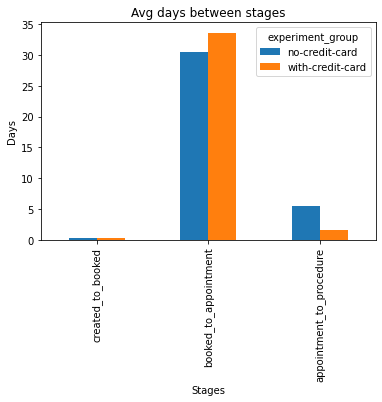

In [58]:
summary_days_table = table_days_conversion.groupby('experiment_group')[['created_to_booked', 'booked_to_appointment', 'appointment_to_procedure']].mean()
summary_days_table.transpose().plot(kind='bar')
plt.title('Avg days between stages')
plt.xlabel('Stages')
plt.ylabel('Days')
plt.show()

### Generate two df for each group

In [59]:
no_credit_card_group = table_days_conversion[table_days_conversion['experiment_group'] == 'no-credit-card']
with_credit_card_group = table_days_conversion[table_days_conversion['experiment_group'] == 'with-credit-card']

### Groups histograms

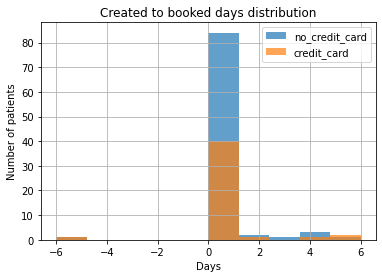

In [60]:
no_credit_card_group['created_to_booked'].hist(bins=10, alpha = 0.7)
with_credit_card_group['created_to_booked'].hist(bins=10, alpha = 0.7)
plt.title('Created to booked days distribution')
plt.xlabel('Days')
plt.ylabel('Number of patients')
plt.legend(['no_credit_card', 'credit_card'])
plt.show()

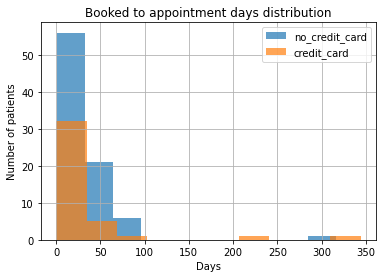

In [61]:
no_credit_card_group['booked_to_appointment'].hist(bins=10, alpha = 0.7)
with_credit_card_group['booked_to_appointment'].hist(bins=10, alpha = 0.7)
plt.title('Booked to appointment days distribution')
plt.xlabel('Days')
plt.ylabel('Number of patients')
plt.legend(['no_credit_card', 'credit_card'])
plt.show()

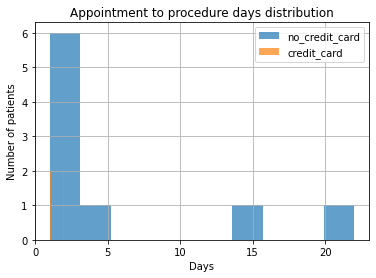

In [62]:
no_credit_card_group['appointment_to_procedure'].hist(bins=10, alpha = 0.7)
with_credit_card_group['appointment_to_procedure'].hist(bins=10, alpha = 0.7)
plt.title('Appointment to procedure days distribution')
plt.xlabel('Days')
plt.ylabel('Number of patients')
plt.legend(['no_credit_card', 'credit_card'])
plt.show()

### Groups box charts

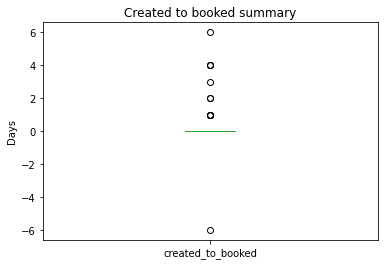

In [63]:
no_credit_card_group['created_to_booked'].plot(kind='box')
plt.title('Created to booked summary')
plt.ylabel('Days')
plt.show()

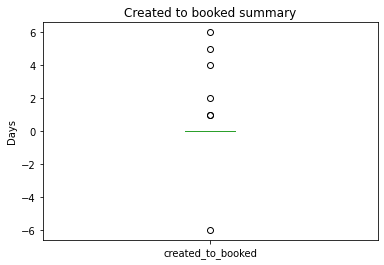

In [64]:
with_credit_card_group['created_to_booked'].plot(kind='box')
plt.title('Created to booked summary')
plt.ylabel('Days')
plt.show()

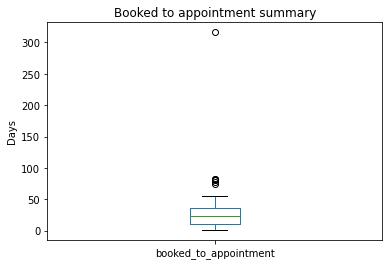

In [65]:
no_credit_card_group['booked_to_appointment'].plot(kind='box')
plt.title('Booked to appointment summary')
plt.ylabel('Days')
plt.show()

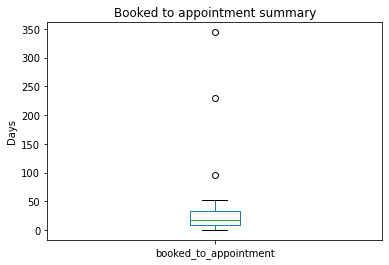

In [66]:
with_credit_card_group['booked_to_appointment'].plot(kind='box')
plt.title('Booked to appointment summary')
plt.ylabel('Days')
plt.show()

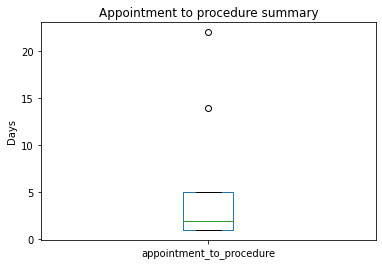

In [67]:
no_credit_card_group['appointment_to_procedure'].plot(kind='box')
plt.title('Appointment to procedure summary')
plt.ylabel('Days')
plt.show()

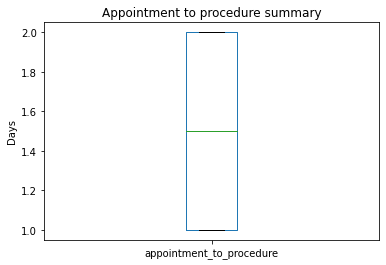

In [68]:
with_credit_card_group['appointment_to_procedure'].plot(kind='box')
plt.title('Appointment to procedure summary')
plt.ylabel('Days')
plt.show()